In [11]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [12]:
data = pd.read_pickle("./processed_files/01a_preprocessing.pkl")
data

,ARR_MIN_OF_DAY_COS,JET(YN),WINGLETS(YN),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),NR_ENGINES,APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),...,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_DELAY_MINS,DELAY_CATEGORY
5612585,0.446798,1,1,410.0,2811.51698,0,2,251.872,34.101024,37.572696,...,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.894635,-10,1
5614966,0.305184,1,0,448.0,3442.37826,2,2,261.132,34.314384,42.114216,...,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.952293,-8,1
5616651,0.116537,1,0,421.0,3044.87128,2,2,261.132,34.314384,42.114216,...,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.993186,-20,0
5616326,0.100522,1,0,450.0,3442.37826,2,2,264.836,38.048184,54.431184,...,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.994935,-7,1
5613460,0.040266,1,0,458.0,3442.37826,2,2,261.132,34.314384,42.114216,...,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.999189,-6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,0.838671,1,1,122.0,928.58918,8,2,251.872,34.101024,37.572696,...,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.544639,-10,1
11283412,0.855781,1,0,290.0,1929.59866,8,2,261.132,34.314384,42.114216,...,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.517338,17,2
11284363,0.855781,1,0,170.0,951.11994,8,2,261.132,34.314384,42.114216,...,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.517338,5,1
11286614,0.864005,1,1,179.0,1522.43564,11,2,251.872,34.101024,37.572696,...,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.503484,30,2


In [14]:
bins = [data["ARR_DELAY_MINS"].min(),-10,10,data["ARR_DELAY_MINS"].max()+1]
cats = pd.cut(data.ARR_DELAY_MINS, bins, labels = [0,1,2],include_lowest = True)
data["DELAY_CATEGORY"] = list(cats.values)
data = data.drop(["ARR_DELAY_MINS"], axis="columns")
data

,ARR_MIN_OF_DAY_COS,JET(YN),WINGLETS(YN),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),NR_ENGINES,APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),...,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,DELAY_CATEGORY
5612585,0.446798,1,1,410.0,2811.51698,0,2,251.872,34.101024,37.572696,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.894635,0
5614966,0.305184,1,0,448.0,3442.37826,2,2,261.132,34.314384,42.114216,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.952293,1
5616651,0.116537,1,0,421.0,3044.87128,2,2,261.132,34.314384,42.114216,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.993186,0
5616326,0.100522,1,0,450.0,3442.37826,2,2,264.836,38.048184,54.431184,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.994935,1
5613460,0.040266,1,0,458.0,3442.37826,2,2,261.132,34.314384,42.114216,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.999189,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,0.838671,1,1,122.0,928.58918,8,2,251.872,34.101024,37.572696,...,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.544639,0
11283412,0.855781,1,0,290.0,1929.59866,8,2,261.132,34.314384,42.114216,...,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.517338,2
11284363,0.855781,1,0,170.0,951.11994,8,2,261.132,34.314384,42.114216,...,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.517338,1
11286614,0.864005,1,1,179.0,1522.43564,11,2,251.872,34.101024,37.572696,...,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.503484,2


In [ ]:
print("Shape of X_train: " + str(X_train.shape))
print("Shape of y_train: " + str(y_train.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of y_test: " + str(y_test.shape))

ros = RandomOverSampler(random_state=42)
X_train_OS, y_train_OS = ros.fit_resample(X_train, y_train)

transformer = MinMaxScaler().fit(X_train)
with open("./processed_files/00_scale_transformer.pkl","wb") as f:
    pickle.dump(transformer,f)

print("Unique Values before resampling: \n")
print(np.unique(y_train, return_counts=True))
print("Unique Values after resampling: \n")
print(np.unique(y_train_OS, return_counts=True))

In [2]:
X_train = pd.read_pickle("processed_files/01c_train_X_RS.pkl")
X_cols = X_train.columns
y_train = pd.read_pickle("processed_files/01c_train_y_RS.pkl").to_numpy().ravel()
X_train

,ARR_MIN_OF_DAY_COS,JET(YN),WINGLETS(YN),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),NR_ENGINES,APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),...,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
0,-0.457575,1,1,176.0,975.26004,64,2,251.872,34.101024,37.572696,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.623490,-0.889171
1,-0.435956,1,0,63.0,263.93176,63,2,257.428,28.446984,37.795200,...,0,0,0.0,3.0,3.0,0.0,3.0,-0.433884,-0.900969,-0.899968
2,-0.818381,1,0,183.0,1108.83526,64,2,261.132,34.314384,42.114216,...,0,0,1.0,3.0,1.0,3.0,1.0,-0.781831,0.623490,0.574676
3,0.561417,1,0,148.0,683.96950,71,2,264.836,38.048184,54.431184,...,0,0,3.0,3.0,3.0,3.0,0.0,0.781831,0.623490,-0.827533
4,-0.827533,1,1,119.0,236.57298,69,2,259.280,20.930616,26.770584,...,0,0,3.0,3.0,3.0,0.0,0.0,-0.433884,-0.900969,0.561417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474604,-0.933580,1,0,114.0,774.09254,39,3,255.576,47.335440,55.565040,...,0,0,3.0,0.0,0.0,0.0,3.0,0.000000,1.000000,0.358368
474605,-0.899968,1,0,172.0,951.11994,87,2,257.428,28.446984,37.795200,...,0,0,0.0,0.0,0.0,0.0,3.0,0.433884,-0.900969,-0.435956
474606,-0.428693,1,0,140.0,1145.85008,50,3,255.576,47.335440,55.565040,...,0,0,1.0,1.0,1.0,1.0,2.0,-0.433884,-0.900969,0.903450
474607,0.500000,1,0,70.0,434.52180,56,2,238.908,28.346400,30.531816,...,2,0,3.0,0.0,3.0,0.0,3.0,0.974928,-0.222521,-0.866025


In [3]:
y_train

array([1, 2, 1, ..., 2, 2, 2], dtype=int64)

In [4]:
with open("./processed_files/00_scale_transformer.pkl","rb") as f:
    transformer = pickle.load(f)

X_train = transformer.transform(X_train)
X_train

array([[0.27121335, 1.        , 1.        , ..., 0.09903113, 0.80193774,
        0.05541461],
       [0.28202304, 1.        , 0.        , ..., 0.27747907, 0.        ,
        0.05001606],
       [0.09080975, 1.        , 0.        , ..., 0.09903113, 0.80193774,
        0.78733784],
       ...,
       [0.28565488, 1.        , 0.        , ..., 0.27747907, 0.        ,
        0.95172522],
       [0.75000304, 1.        , 0.        , ..., 1.        , 0.35689587,
        0.0669873 ],
       [0.01134891, 1.        , 0.        , ..., 0.5       , 1.        ,
        0.39407517]])

In [5]:
clf = RandomForestClassifier(n_estimators=250)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [6]:
ft_importance = clf.feature_importances_
ft_importance

array([9.83638619e-02, 4.02291350e-06, 4.81374675e-03, 1.17569390e-01,
       1.12811082e-01, 9.17263483e-02, 3.73651545e-03, 1.53712996e-02,
       1.32636913e-02, 1.60693833e-02, 1.42622662e-02, 1.48351556e-02,
       3.81547008e-02, 4.77827938e-02, 3.83084488e-02, 3.30591038e-02,
       6.11513555e-03, 5.33458829e-02, 6.24758249e-03, 4.37327825e-02,
       2.28000532e-03, 7.74259359e-04, 5.90824799e-04, 5.76905292e-04,
       4.50098663e-06, 8.91616848e-07, 1.65335639e-04, 1.69392435e-03,
       7.06810898e-03, 3.21860664e-07, 1.14762421e-02, 2.09761486e-03,
       1.24576119e-02, 1.17408228e-02, 1.22859308e-02, 1.27140341e-02,
       1.33170845e-02, 2.08225960e-02, 1.51711644e-02, 1.05188627e-01])

In [7]:
ft_importance = np.column_stack((ft_importance,X_cols))
ft_importance

array([[0.09836386192037977, 'ARR_MIN_OF_DAY_COS'],
       [4.022913495452221e-06, 'JET(YN)'],
       [0.004813746747267752, 'WINGLETS(YN)'],
       [0.11756938962657923, 'CRS_ELAPSED_TIME(MINS)'],
       [0.11281108172189533, 'DISTANCE(KM)'],
       [0.09172634830583638, 'NR_PREV_ARR_FLIGHTS(1HR)'],
       [0.0037365154478304187, 'NR_ENGINES'],
       [0.015371299615982627, 'APPROACH_SPEED(KMH)'],
       [0.013263691313575422, 'WINGSPAN(M)'],
       [0.01606938325473503, 'LENGTH(M)'],
       [0.014262266168368716, 'TAIL_HEIGHT(M)'],
       [0.014835155627431653, 'MTOW(KG)'],
       [0.03815470078416321, 'TEMP(C)'],
       [0.047782793783949805, 'REL_HUMIDITY(PERCENT)'],
       [0.03830844880194491, 'WIND_DRCT(DEG)'],
       [0.033059103799651365, 'WIND_SPEED(KMH)'],
       [0.006115135547488095, '1HOUR_PRECIPITATION(INCH)'],
       [0.053345882866531795, 'SEA_LEVEL_PRESSURE(MILLIBAR)'],
       [0.0062475824923673325, 'VISIBILITY(MILES)'],
       [0.04373278253934091, 'FELT_TEMP(C)'],


In [8]:
ft_importance = ft_importance[np.flip(ft_importance[:,0].argsort())]

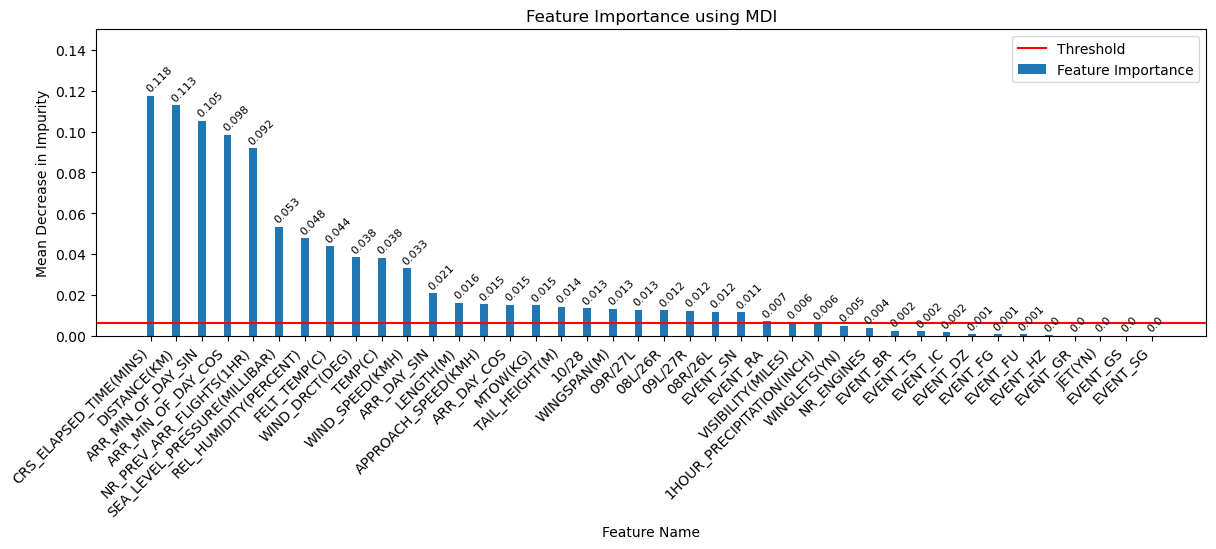

In [9]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.25,y[i]+0.002,round(y[i],3), fontsize=8, rotation=45)

fig, ax = plt.subplots(figsize=(12,4))
ax.bar(ft_importance[:,1],ft_importance[:,0], label="Feature Importance", width=0.3)
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_xlabel("Feature Name")
ax.set_title("Feature Importance using MDI")
fig.tight_layout()
addlabels(ft_importance[:,1], ft_importance[:,0])
plt.xticks(rotation = 45, ha='right', fontsize = 10)
plt.ylim([0,0.15])
plt.axhline(y=0.006, color='r', linestyle = '-', label="Threshold")
plt.legend()
plt.show()

In [39]:
X_train_reduced = pd.read_pickle("processed_files/01c_train_X_RS.pkl")

X_train_reduced = X_train_reduced.drop(list(ft_importance[np.where(ft_importance[:,0] < 0.006)][:,1]), axis="columns")
X_train_reduced.to_pickle("processed_files/01c_train_X_RS_reduced.pkl")
X_train_reduced

,ARR_MIN_OF_DAY_COS,CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),TAIL_HEIGHT(M),MTOW(KG),TEMP(C),...,EVENT_RA,EVENT_SN,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
0,-0.457575,176.0,975.26004,64,251.872,34.101024,37.572696,12.079224,78000.133912,26.111111,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.623490,-0.889171
1,-0.435956,63.0,263.93176,63,257.428,28.446984,37.795200,9.043416,53523.856000,27.777778,...,0,0,0.0,3.0,3.0,0.0,3.0,-0.433884,-0.900969,-0.899968
2,-0.818381,183.0,1108.83526,64,261.132,34.314384,42.114216,12.624816,79015.726400,17.222222,...,0,0,1.0,3.0,1.0,3.0,1.0,-0.781831,0.623490,0.574676
3,0.561417,148.0,683.96950,71,264.836,38.048184,54.431184,13.639800,122469.840000,31.111111,...,0,0,3.0,3.0,3.0,3.0,0.0,0.781831,0.623490,-0.827533
4,-0.827533,119.0,236.57298,69,259.280,20.930616,26.770584,6.324600,21522.940400,17.222222,...,0,0,3.0,3.0,3.0,0.0,0.0,-0.433884,-0.900969,0.561417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474604,-0.933580,114.0,774.09254,39,255.576,47.335440,55.565040,17.800320,206384.360000,-0.611111,...,0,0,3.0,0.0,0.0,0.0,3.0,0.000000,1.000000,0.358368
474605,-0.899968,172.0,951.11994,87,257.428,28.446984,37.795200,9.043416,53523.856000,23.277778,...,0,0,0.0,0.0,0.0,0.0,3.0,0.433884,-0.900969,-0.435956
474606,-0.428693,140.0,1145.85008,50,255.576,47.335440,55.565040,17.800320,206384.360000,5.000000,...,1,0,1.0,1.0,1.0,1.0,2.0,-0.433884,-0.900969,0.903450
474607,0.500000,70.0,434.52180,56,238.908,28.346400,30.531816,11.225784,52389.876000,30.000000,...,0,2,3.0,0.0,3.0,0.0,3.0,0.974928,-0.222521,-0.866025
